# Exercises

Martijn Vermeulen, s1129901


In [22]:
import numpy as np
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from tqdm import tqdm
import seaborn as sns
import pickle
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


In [23]:
# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/FeDX3LfbJ4pC7T6')

## Exercise 1 - simulating place cells
---
Use the code we build to simulate place cells in the lesson.

A - Explore what happens when you change the binning in the definition of the firing rate maps (`space_bins`). Make it coarser or broader. 


B - In the spike train simulations, we add some "baseline" noise, not place-related to the firing. Which variable determines the noise level? Try to experiment with that variable and see what happens to the firing rate maps. What is the best approach to firing rate maps when the noise is high.


C - We could use other approaches to firing rate maps: for example make the binning very small (down to 1 cm, which is the resolution of our "video" data, and then applying a gaussian smoother. Scipy has a Gaussian smoother at `scipy.stats.gaussian_kde`. Read the documentation for that function and apply it to the data to define the smoothed firing rate maps. Again, change the noise levels and see how the smoother changes. 

D - When analyzing place fields, two important quantities are the place field center and the place field width. The place field center may be defined in many ways, but one is to compute the "center of mass" of the spikes according to the equation 

$$ c_{pf} = \frac{1}{N_{spikes}} \sum_{i} L_i $$ 

where the sum on $i$ runs on all spikes emitted by a cell and $L_i$ is the location at which the i-th spike was emitted. Calculate this for each cell. Compare with the "true" place field centers from the simulations (which variables are we talking about?) 


### A

In [24]:
#import data
with open('data/psth_data.pickle', 'rb') as handle:
    data = pickle.load(handle)

spike_times = data['spike_times']
stim_onsets = data['stim_onsets']
stim_type = data['stim_type']
stim_duration = data['stim_duration']


In [25]:
track_length = 200. # the length of our linear track (eg in centimeter)
average_firing_rate = 5 # the peak firing rate, averaged across the population 
n_cells = 100 # how many cells we are recording
pf_centers = np.random.rand(n_cells) * track_length # the centers of the place fields for all cells drawn randomly with a uniform distribution on the track
pf_size = np.random.gamma(10, size=n_cells) # the size (width) of the place fields, drawn randomly from a gamma distribution 
pf_rate = np.random.exponential(scale=average_firing_rate, size=n_cells) # the peak firing rate for each cell, drawn from an exponential distribution

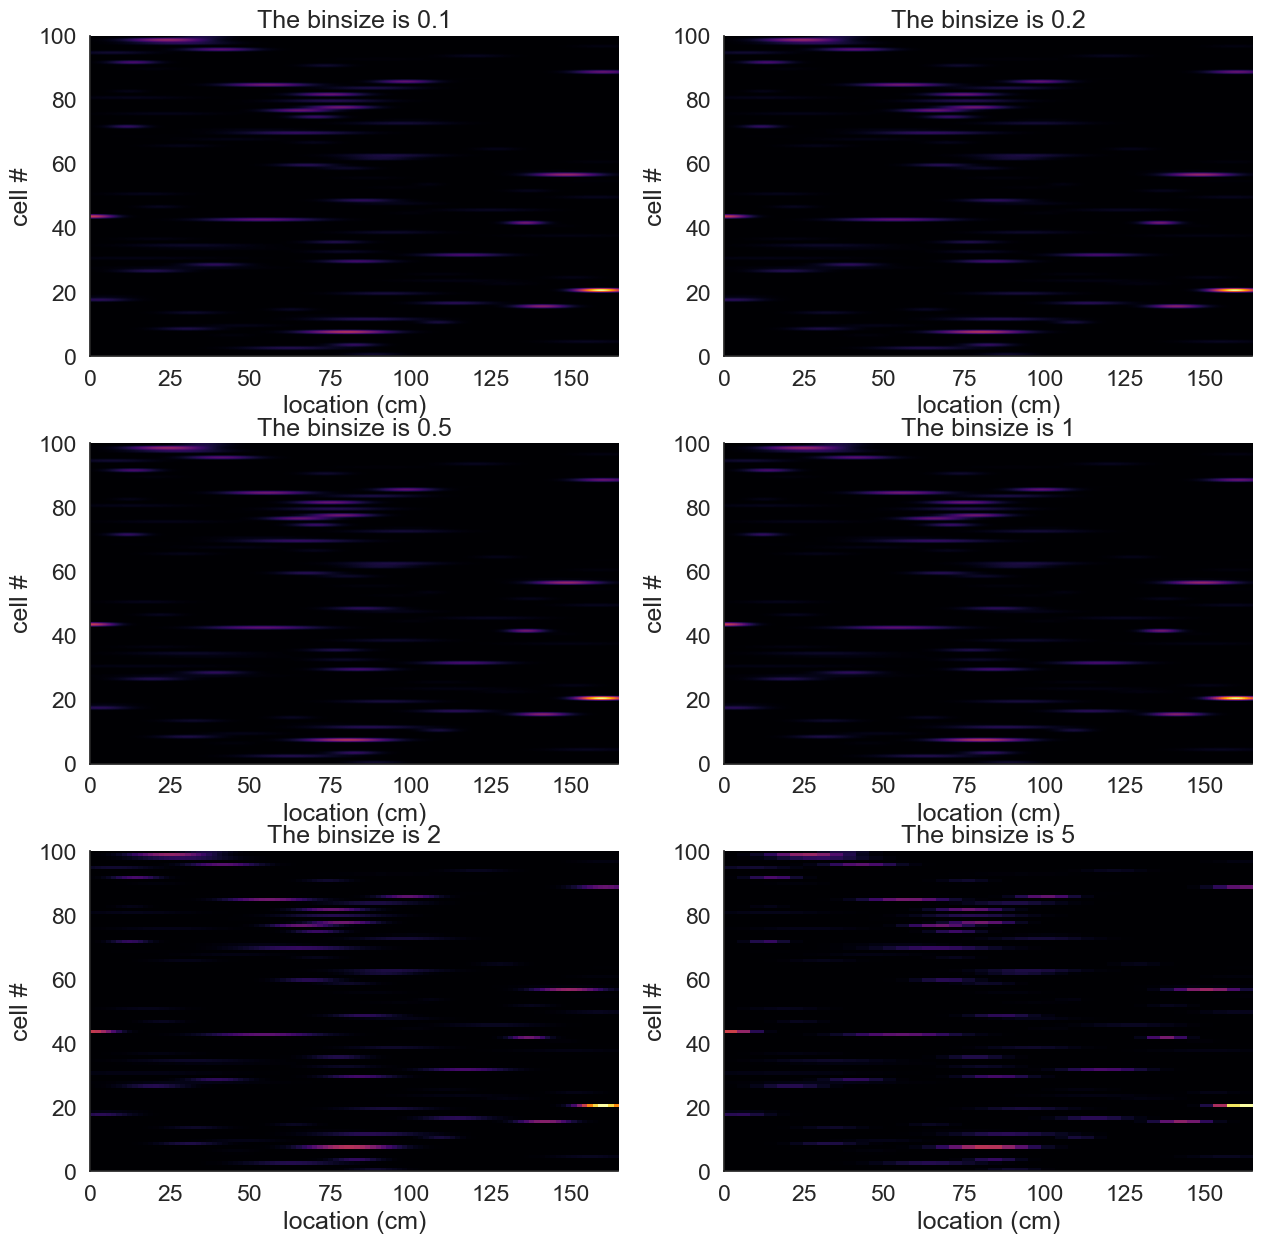

In [26]:
binsize_array = [0.1,0.2,0.5,1,2,5]
#binsize_array = [10]
k = 1
fig = plt.figure(figsize=(15, 15)) 
rows,columns = 3,2

for binsize in binsize_array:
    bins = np.arange(0., 200. ,step =binsize )
    true_firing_rate_maps1 = np.zeros((n_cells, len(bins)))
    for i in range(n_cells):
        true_firing_rate_maps1[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
        
    fig.add_subplot(rows, columns, k) 
    plt.imshow(true_firing_rate_maps1, cmap='inferno',extent = [0, 165, 0, n_cells])
    plt.xlabel('location (cm)')
    plt.ylabel('cell #')
    plt.title(f'The binsize is {binsize}')
    k += 1
    #print(k)

(100, 200)

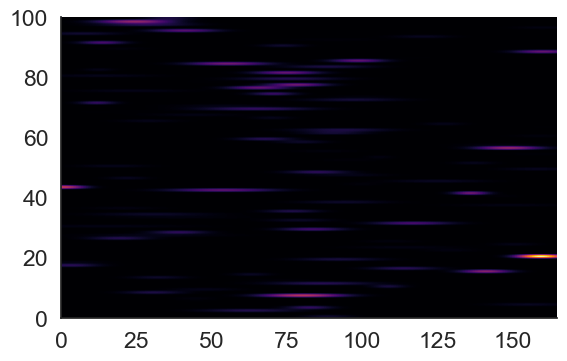

In [27]:
#A

bins = np.arange(0., 200. ,step =1)
true_firing_rate_maps2 = np.zeros((n_cells, len(bins)))
for i in range(n_cells):
    true_firing_rate_maps2[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
#print(true_firing_rate_maps2[1,:])
plt.imshow(true_firing_rate_maps2, cmap='inferno',extent = [0, 165, 0, n_cells])
np.shape(true_firing_rate_maps2)


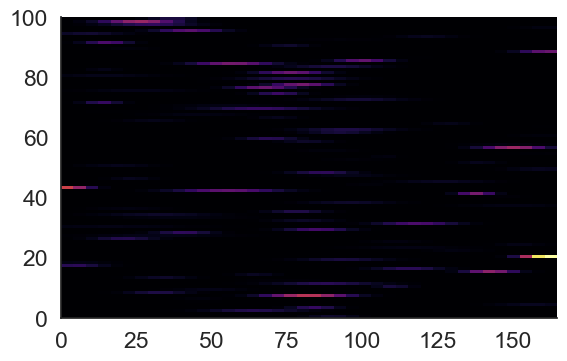

In [28]:
#A

bins = np.arange(0., 200. ,step =5)
true_firing_rate_maps2 = np.zeros((n_cells, len(bins)))
for i in range(n_cells):
    true_firing_rate_maps2[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
#print(true_firing_rate_maps2[1,:])
plt.imshow(true_firing_rate_maps2, cmap='inferno',extent = [0, 165, 0, n_cells])


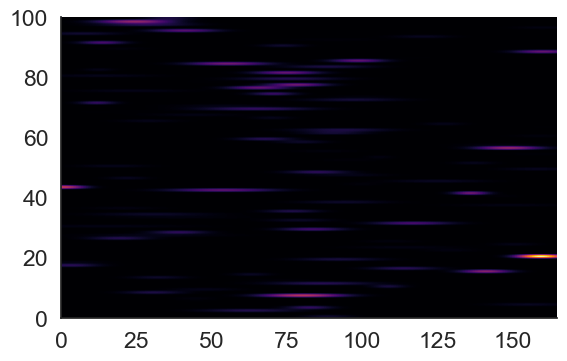

In [29]:
bins = np.arange(0., 200. ,step =1 )
true_firing_rate_maps1 = np.zeros((n_cells, len(bins)))
#print(true_firing_rate_maps1)
for i in range(n_cells):
    true_firing_rate_maps1[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
#print(true_firing_rate_maps1[1])
plt.imshow(true_firing_rate_maps1, cmap='inferno',extent = [0, 165, 0, n_cells])

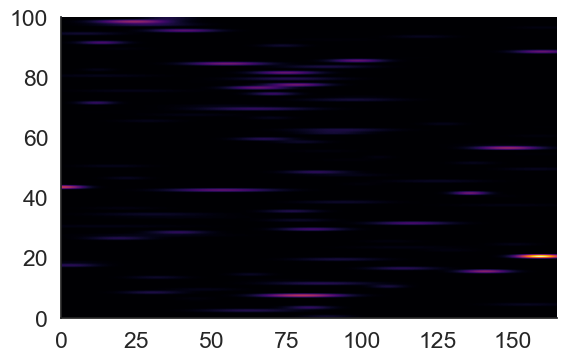

In [30]:
bins = np.arange(0., 200. ,step =0.5 )
true_firing_rate_maps1 = np.zeros((n_cells, len(bins)))
#print(true_firing_rate_maps1)
for i in range(n_cells):
    true_firing_rate_maps1[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
#print(true_firing_rate_maps1[1])
plt.imshow(true_firing_rate_maps1, cmap='inferno',extent = [0, 165, 0, n_cells])

By increasing the bin size. The positions get less accurate but we can still see the positions. There is a problem with plotting, if I change the extent to 200 it doesn't accurately display the bin size, so I set it to 165 but this doesn't change the results

### B

In [31]:
import numpy as np
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from tqdm import tqdm
import seaborn as sns
import pickle
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


In [32]:
# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/FeDX3LfbJ4pC7T6')

In [41]:
#B
n_runs = 20 
av_running_speed = 10 # the average running speed (in cm/s)
fps = 30 # the number of "video frames" per second 
running_speed_a = np.random.chisquare(10, size=n_runs) # running speed in the two directions
running_speed_b = np.random.chisquare(10, size=n_runs) 

stopping_time_a = np.random.chisquare(15, size=n_runs) # the time the mouse will spend at the two ends of the track
stopping_time_b = np.random.chisquare(15, size=n_runs)

x = np.array([])
for i in range(n_runs):
    stop1 = np.ones((int(stopping_time_a[i]*fps),)) * 0.
    run_length = len(bins) * fps / running_speed_a[i]
    run1 = np.linspace(0., float(len(bins)-1), int(run_length))
    stop2 = np.ones((int(stopping_time_b[i]*fps),)) * (len(bins)-1.)
    run_length = len(bins) * fps / running_speed_b[i]
    run2 = np.linspace(len(bins)-1., 0., int(run_length))
    x = np.concatenate((x, stop1, run1, stop2, run2))
t = np.arange(len(x))/fps

#bins = np.arange(0., 200.)
#true_firing_rate_maps = np.zeros((n_cells, len(bins)))
#for i in range(n_cells):
#    true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))

In [42]:
#import data
with open('data/psth_data.pickle', 'rb') as handle:
    data = pickle.load(handle)

spike_times = data['spike_times']
stim_onsets = data['stim_onsets']
stim_type = data['stim_type']
stim_duration = data['stim_duration']

track_length = 200. # the length of our linear track (eg in centimeter)
average_firing_rate = 5 # the peak firing rate, averaged across the population 
n_cells = 100 # how many cells we are recording
pf_centers = np.random.rand(n_cells) * track_length # the centers of the place fields for all cells drawn randomly with a uniform distribution on the track
pf_size = np.random.gamma(10, size=n_cells) # the size (width) of the place fields, drawn randomly from a gamma distribution 
pf_rate = np.random.exponential(scale=average_firing_rate, size=n_cells) # the peak firing rate for each cell, drawn from an exponential distribution


In [43]:
sampling_rate = 10000.
t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
x_sampling = np.floor(np.interp(t_sampling, t, x))
noise_firing_rate = 0.1 # the baseline noise firing rate
spikes = []

for i in tqdm(range(n_cells)):
    inst_rate = true_firing_rate_maps[i,x_sampling.astype(np.int32)] + noise_firing_rate
    spikes_loc = np.random.poisson(inst_rate/sampling_rate)
    sp = np.argwhere(spikes_loc)
    t_sp = t_sampling[sp]
    spikes.append(t_sp)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.38it/s]


1
2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


2
3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.22it/s]


3
4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


4
5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.26it/s]


5
6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.26it/s]


6
7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


7
8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.17it/s]


8
9


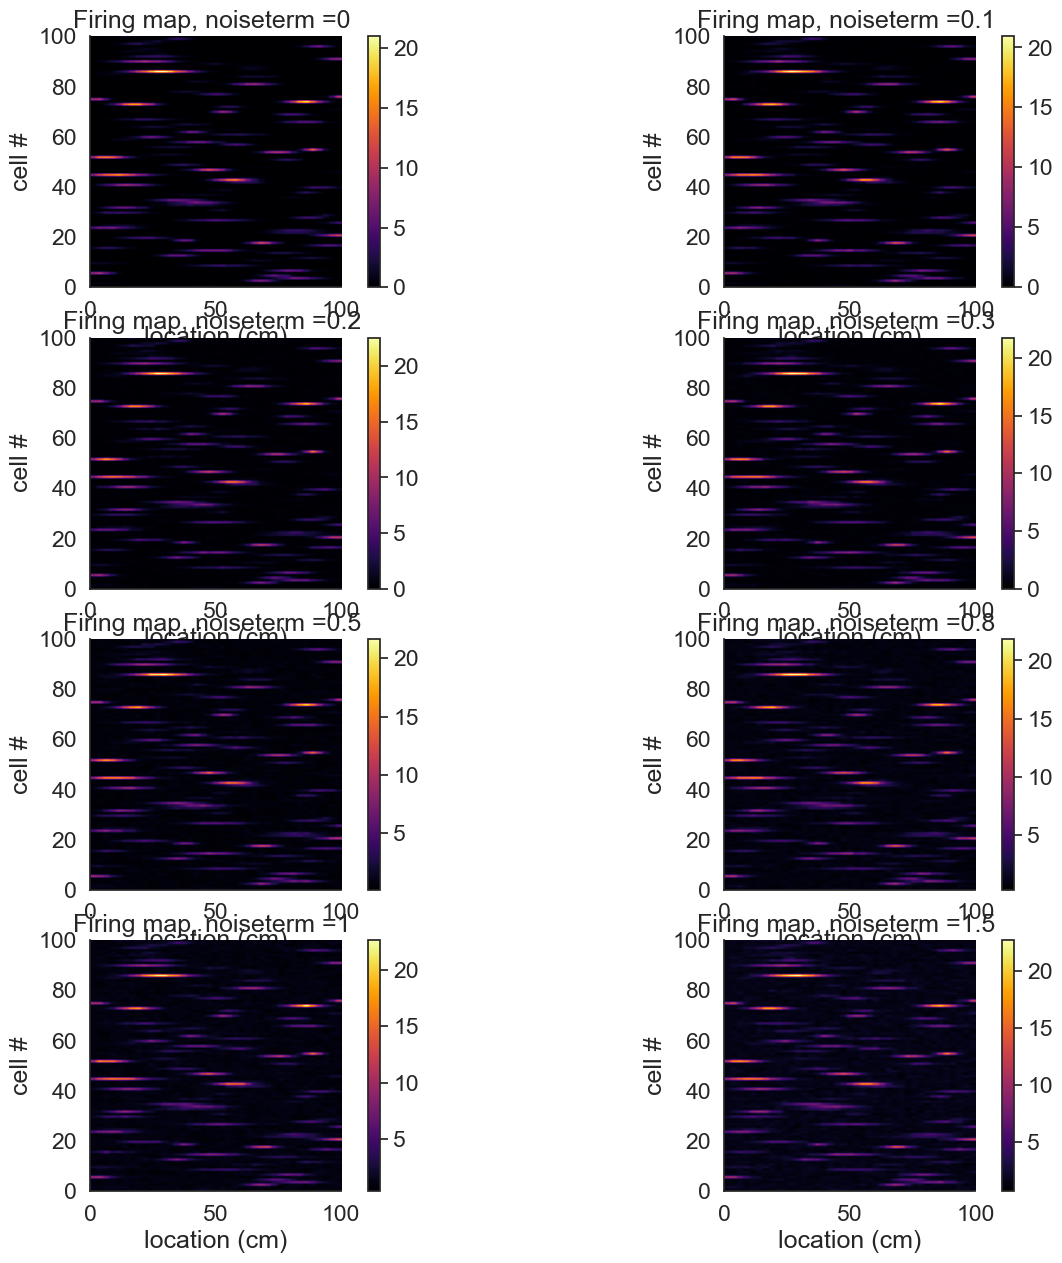

In [44]:
sampling_rate = 10000.
t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
x_sampling = np.floor(np.interp(t_sampling, t, x))
noise_firing_rate_array = [0,0.1,0.2,0.3,0.5,0.8,1,1.5] # the baseline noise firing rate
spikes = []
firing_maps_array = np.zeros((len(noise_firing_rate_array),100,39))

k = 1
fig = plt.figure(figsize=(15, 15)) 
rows,columns = 4,2



for noise_firing_rate in noise_firing_rate_array:
    sampling_rate = 10000.
    t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
    x_sampling = np.floor(np.interp(t_sampling, t, x))
    spikes=[]
    for i in tqdm(range(n_cells)):
        inst_rate = true_firing_rate_maps[i,x_sampling.astype(np.int32)] + noise_firing_rate
        spikes_loc = np.random.poisson(inst_rate/sampling_rate)
        sp = np.argwhere(spikes_loc)
        t_sp = t_sampling[sp]
        spikes.append(t_sp)
        
    spike_positions = [np.interp(s, t, x) for s in spikes]

    space_bins = np.arange(0., 200., 5.)

    # we compute histograms for eaxh cell
    spikes_hist = [np.histogram(s, space_bins)[0] for s in spike_positions]

    # put them together into a matrix of floating point numbers (for plotting)
    spikes_hist = np.vstack(spikes_hist).astype(np.float64)

    # we also need an "occupancy histogram" in order to normalize the firing rates maps 
    occupancy = np.histogram(x, space_bins)[0] /  fps

    firing_rate_maps = spikes_hist / occupancy 
    
    firing_maps_array[k-1][:][:] =  firing_rate_maps[:][:]
    
    
    fig.add_subplot(rows, columns, k)
        
        
    plt.imshow(firing_rate_maps, cmap='inferno', extent = [0, 100, 0, n_cells])
    plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
    plt.xlabel('location (cm)')
    plt.ylabel('cell #')
    plt.colorbar()
    print(k)
    k +=1
    print(k)

In [45]:
bins = np.arange(0., 200.)
true_firing_rate_maps = np.zeros((n_cells, len(bins)))
for i in range(n_cells):
    true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))

In [46]:

#Make a funciton to make the true_firing_rate_maps for different noise levels
def Change_noise_firing_rate_map(noise_firing_rate = 1):
    sampling_rate = 10000.
    t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
    x_sampling = np.floor(np.interp(t_sampling, t, x))
    #noise_firing_rate = 1
    spikes=[]




    for i in tqdm(range(n_cells)):
        inst_rate = true_firing_rate_maps[i,x_sampling.astype(np.int32)] + noise_firing_rate
        spikes_loc = np.random.poisson(inst_rate/sampling_rate)
        sp = np.argwhere(spikes_loc)
        t_sp = t_sampling[sp]
        spikes.append(t_sp)

    spike_positions = [np.interp(s, t, x) for s in spikes]

    space_bins = np.arange(0., 200.)

    # we compute histograms for eaxh cell
    spikes_hist = [np.histogram(s, space_bins)[0] for s in spike_positions]

    # put them together into a matrix of floating point numbers (for plotting)
    spikes_hist = np.vstack(spikes_hist).astype(np.float64)

    # we also need an "occupancy histogram" in order to normalize the firing rates maps 
    occupancy = np.histogram(x, space_bins)[0] /  fps

    firing_rate_maps = spikes_hist / occupancy 
    return firing_rate_maps

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.36it/s]


Text(0, 0.5, 'cell #')

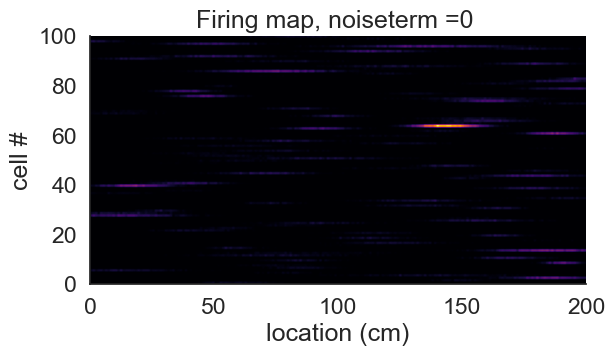

In [47]:
noise_firing_rate = 0
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.14it/s]


Text(0, 0.5, 'cell #')

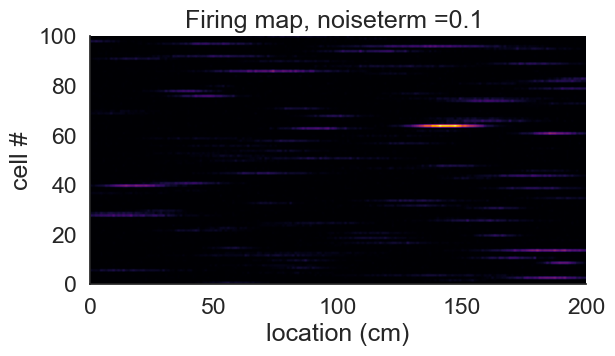

In [48]:
noise_firing_rate = 0.1
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.20it/s]


Text(0, 0.5, 'cell #')

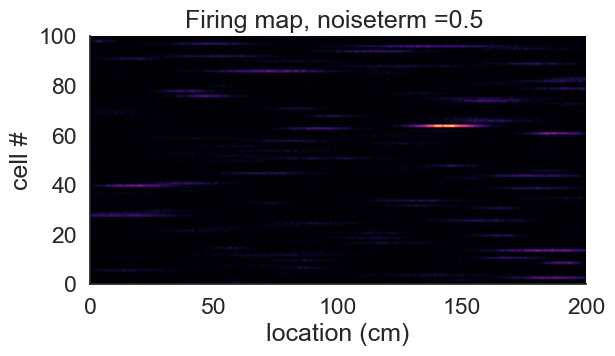

In [49]:
noise_firing_rate = 0.5
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.20it/s]


Text(0, 0.5, 'cell #')

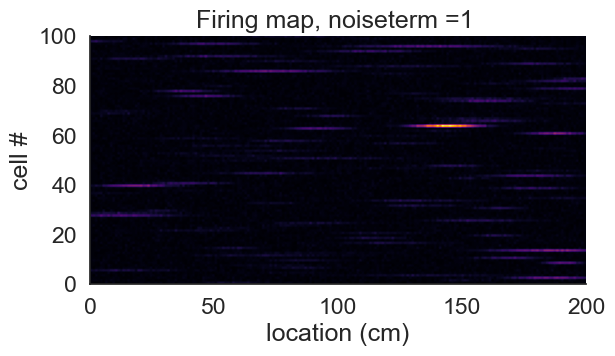

In [50]:
noise_firing_rate = 1
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


Text(0, 0.5, 'cell #')

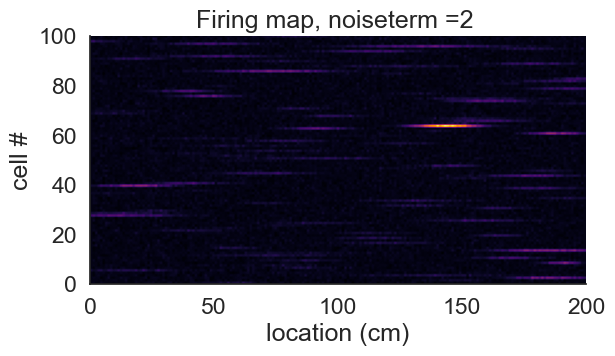

In [51]:
noise_firing_rate = 2
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


Text(0, 0.5, 'cell #')

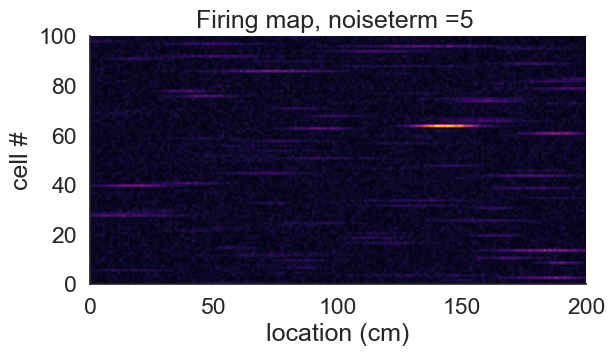

In [52]:
noise_firing_rate = 5
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.12it/s]


Text(0, 0.5, 'cell #')

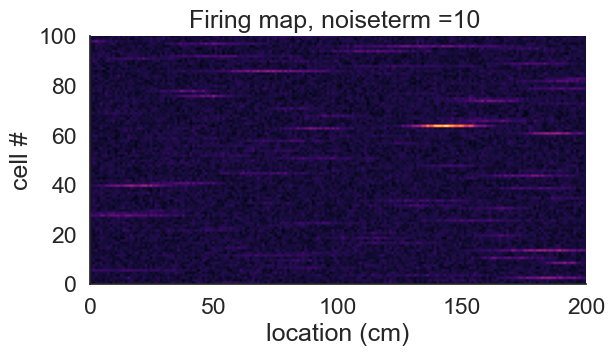

In [53]:
noise_firing_rate = 10
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')

As we increase the noise term we can see that the locations become more unclear, this is esspecially visable when the noise term is very high. The best approach when the noise is very high is to try to remove the noise by disregarding term under a certian value. Than only high values remain and the location can still be determined. 

### C

In [54]:
from scipy.stats import gaussian_kde

In [56]:
bins = np.arange(0., 200.,1) # Every bin is 1 cm 
true_firing_rate_maps = np.zeros((n_cells, len(bins)))
for i in range(n_cells):
    true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))

noise_firing_rate = 0.1
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)
a = np.shape(firing_rate_maps_noise)
for i in range(a[1]):
    kernel = gaussian_kde(firing_rate_maps_noise[i])
    for j in range(a[2]):
        firing_rate_maps_noise[j][i] = kernel.pdf(bins)[j]
plt.imshow(firing_rate_maps_noise, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.title(f'Firing map, noiseterm ={noise_firing_rate} ')
plt.xlabel('location (cm)')
plt.ylabel('cell #')
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


IndexError: tuple index out of range

In [ ]:
kernel = gaussian_kde(firing_rate_maps_noise[1])
b = kernel.pdf(bins)


In [ ]:
b[10]

### D

In [80]:
#Function that calculates the centre of mass. 
def centreOfMass(neuron):
    a = np.shape(neuron)
    #print(a)
    com_array = []
    for i in range(a[0]):
        add = 0
        divider = 0
        for j in range(a[1]):
            add += neuron[i][j] *j
           # print(add)
        com_array = np.append(com_array,add/sum(neuron[i]))
        
    return com_array


In [58]:
noise_firing_rate = 10
bins = np.arange(0., 200.)
true_firing_rate_maps = np.zeros((n_cells, len(bins)))
for i in range(n_cells):
    true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
firing_rate_maps_noise = Change_noise_firing_rate_map(noise_firing_rate)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.18it/s]


In [68]:
true_firing_rate_maps[1][2]

6.022811103147398e-28

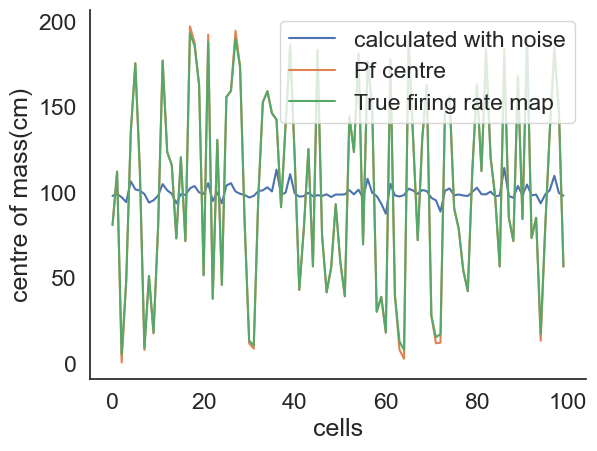

In [82]:
center_off_masses = centreOfMass(firing_rate_maps_noise)
center_off_masses_true = centreOfMass(true_firing_rate_maps)
plt.plot(center_off_masses, label = 'calculated with noise')
plt.xlabel('cells')
plt.ylabel('centre of mass(cm)')
plt.plot(pf_centers,label = "Pf centre")
plt.plot(center_off_masses_true, label = 'True firing rate map')
plt.legend()

As can be seen the calculated centre off masses of the true firing rate map are equel to the pf centre, the pf center is the real centre. For the noise the center of mass can not be calculated correctly. The noise of 10 is way to hight to accurately determine the centre of mass. 

## Exercise 2 - mutual information
---
A - Implement the mutual information formula discussed in the lesson, and apply it to the place cell data we simulated.

B - Adapt the simulation so that you can systematically vary 1) Peak firing rate, 2) place cell size 3) baseline noise. 
Study how mutual information vary with these parameters. Use both definition of mutual information above, and discuss the differences between them. Make some plots to show how the dependency goes.

### A

In [83]:
track_length = 200. # the length of our linear track (eg in centimeter)
average_firing_rate = 5 # the peak firing rate, averaged across the population 
n_cells = 100 # how many cells we are recording
pf_centers = np.random.rand(n_cells) * track_length # the centers of the place fields for all cells drawn randomly with a uniform distribution on the track
pf_size = np.random.gamma(10, size=n_cells) # the size (width) of the place fields, drawn randomly from a gamma distribution 
pf_rate = np.random.exponential(scale=average_firing_rate, size=n_cells) # the peak firing rate for each cell, drawn from an exponential distribution

In [84]:
bins = np.arange(0., 200.)
true_firing_rate_maps = np.zeros((n_cells, len(bins)))
for i in range(n_cells):
    true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))

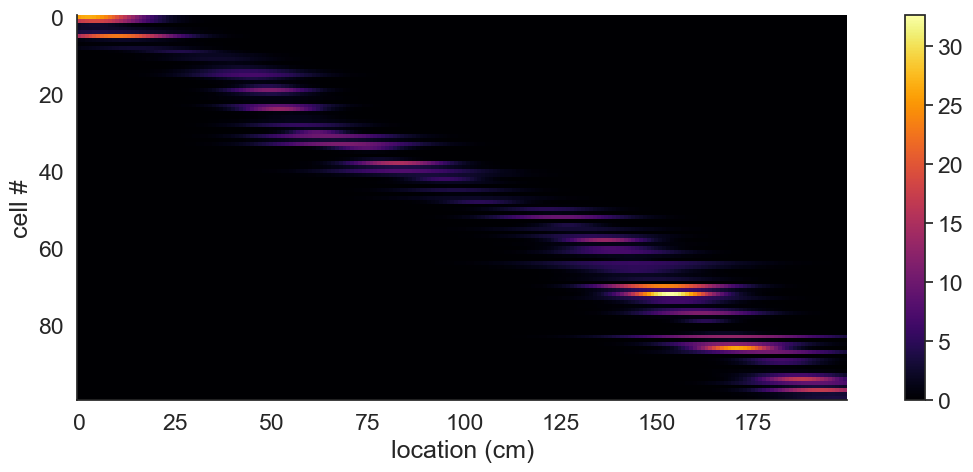

In [85]:
plt.figure(figsize=(15,5))
ix = np.argsort(pf_centers)
plt.imshow(true_firing_rate_maps[ix,:], cmap='inferno')
plt.xlabel('location (cm)')
plt.ylabel('cell #')
plt.colorbar()

In [86]:
n_runs = 20 
av_running_speed = 10 # the average running speed (in cm/s)
fps = 30 # the number of "video frames" per second 
running_speed_a = np.random.chisquare(10, size=n_runs) # running speed in the two directions
running_speed_b = np.random.chisquare(10, size=n_runs) 

stopping_time_a = np.random.chisquare(15, size=n_runs) # the time the mouse will spend at the two ends of the track
stopping_time_b = np.random.chisquare(15, size=n_runs)

x = np.array([])
for i in range(n_runs):
    stop1 = np.ones((int(stopping_time_a[i]*fps),)) * 0.
    run_length = len(bins) * fps / running_speed_a[i]
    run1 = np.linspace(0., float(len(bins)-1), int(run_length))
    stop2 = np.ones((int(stopping_time_b[i]*fps),)) * (len(bins)-1.)
    run_length = len(bins) * fps / running_speed_b[i]
    run2 = np.linspace(len(bins)-1., 0., int(run_length))
    x = np.concatenate((x, stop1, run1, stop2, run2))
t = np.arange(len(x))/fps

In [87]:
sampling_rate = 10000.
t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
x_sampling = np.floor(np.interp(t_sampling, t, x))
noise_firing_rate = 0.1 # the baseline noise firing rate
spikes = []

for i in tqdm(range(n_cells)):
    inst_rate = true_firing_rate_maps[i,x_sampling.astype(np.int32)] + noise_firing_rate
    spikes_loc = np.random.poisson(inst_rate/sampling_rate)
    sp = np.argwhere(spikes_loc)
    t_sp = t_sampling[sp]
    spikes.append(t_sp)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.81it/s]


In [88]:
spike_positions = [np.interp(s, t, x) for s in spikes]


space_bins = np.arange(0., 200.,5)

# we compute histograms for eaxh cell
spikes_hist= [np.histogram(s, space_bins)[0] for s in spike_positions]

# put them together into a matrix of floating point numbers (for plotting)
spikes_hist = np.vstack(spikes_hist).astype(np.float64)

# we also need an "occupancy histogram" in order to normalize the firing rates maps 
occupancy = np.histogram(x, space_bins)[0] /  fps

firing_rate_maps = spikes_hist / occupancy 

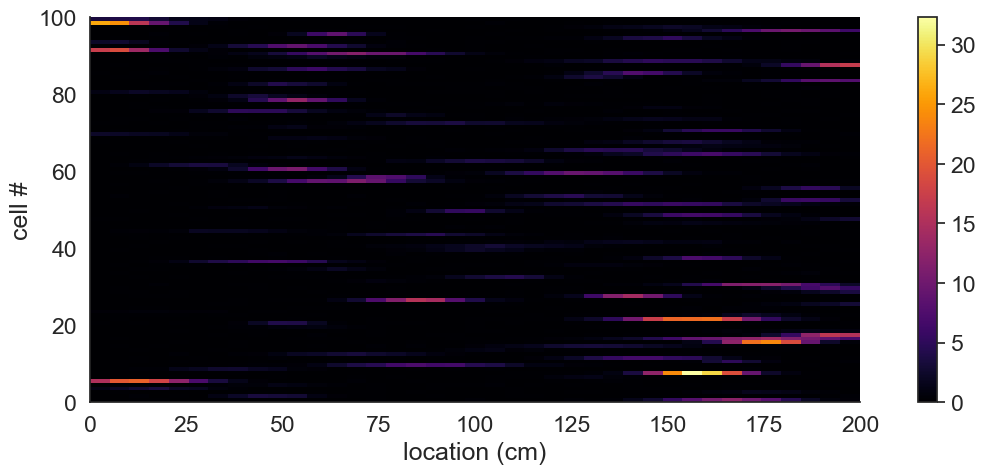

In [89]:
plt.figure(figsize=(15,5))
plt.imshow(firing_rate_maps, cmap='inferno', extent = [0, 200, 0, n_cells])
plt.xlabel('location (cm)')
plt.ylabel('cell #')
plt.colorbar()

In [90]:
def mutualInformation(firing_rate_map,occupancy):
    de = 10**(-15)
    Information = 0
    average_firing_rate = np.mean(firing_rate_map)
    #average_firing_rate = 5
    for j in range(len(firing_rate_map)):
        Information += firing_rate_map[j] * np.log2((firing_rate_map[j]+de)/average_firing_rate * occupancy[j])
    InformationS = Information/average_firing_rate
    return Information, InformationS


In [91]:
firing_rate_maps_sorted = true_firing_rate_maps[ix,:]

In [92]:
mutualInformation(firing_rate_maps[5],occupancy)

(167.52058415557232, 250.9731574724986)

In [93]:
mutualInformation_array = []
mutualInformationS_array = []
for i in range(np.shape(firing_rate_maps)[0]):
    
    mutualInformation_array = np.append(mutualInformation_array,mutualInformation(firing_rate_maps[i],occupancy)[0])
    mutualInformationS_array = np.append(mutualInformationS_array,mutualInformation(firing_rate_maps[i],occupancy)[1])

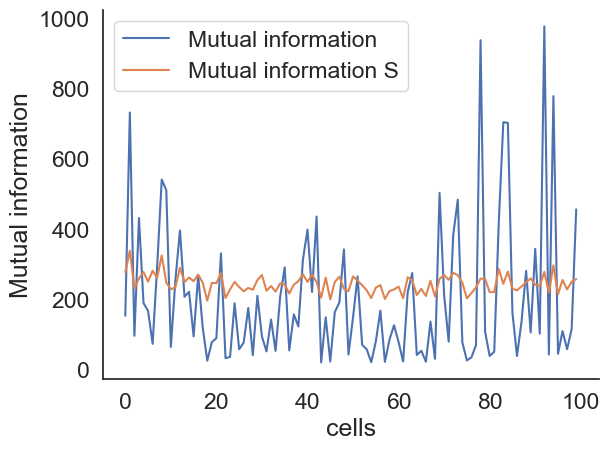

In [95]:
plt.plot(mutualInformation_array,label = 'Mutual information')
plt.plot(mutualInformationS_array,label = 'Mutual information S')

plt.xlabel('cells')
plt.ylabel('Mutual information')
plt.legend()

### B

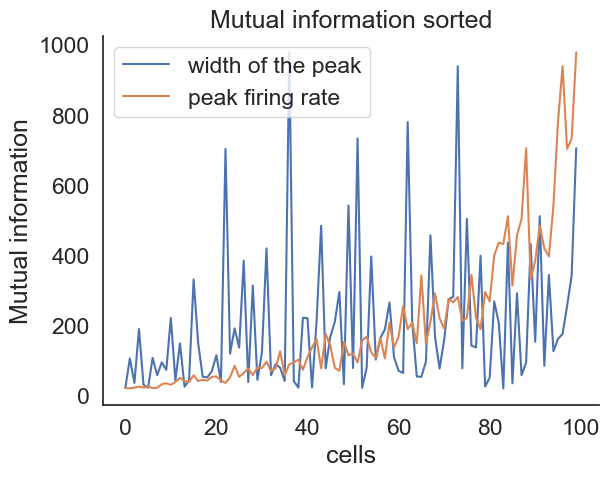

In [96]:
#sort for the width of the peak and the peak firing rate

pf_size_sort = np.argsort(pf_size)
pf_rate_sort = np.argsort(pf_rate)


plt.plot(mutualInformation_array[pf_size_sort],label = ('width of the peak'))
plt.plot(mutualInformation_array[pf_rate_sort],label = ('peak firing rate'))
plt.xlabel('cells')
plt.ylabel('Mutual information')
plt.title('Mutual information sorted')
plt.legend()

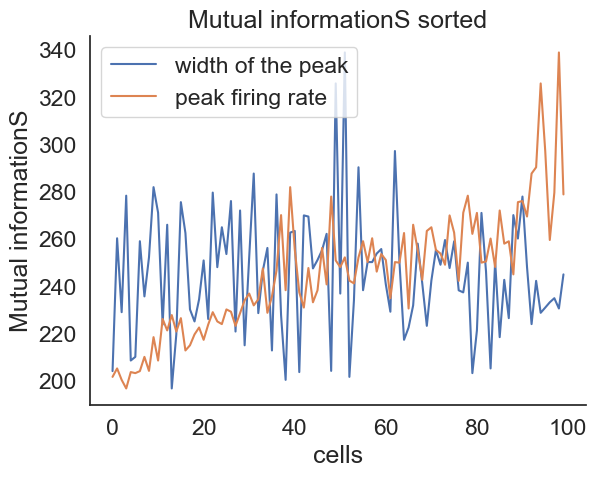

In [97]:
pf_size_sort = np.argsort(pf_size)
pf_rate_sort = np.argsort(pf_rate)


plt.plot(mutualInformationS_array[pf_size_sort],label = ('width of the peak'))
plt.plot(mutualInformationS_array[pf_rate_sort],label = ('peak firing rate'))
plt.xlabel('cells')
plt.ylabel('Mutual informationS')
plt.title('Mutual informationS sorted')
plt.legend()

The mutual information increases for an increased firing rate. The width of the peak doesn't seem to influence the mutual information.

In [98]:
def change_Noise_ex2(noise_firing_rate):
    
    bins = np.arange(0., 200.)
    true_firing_rate_maps = np.zeros((n_cells, len(bins)))
    for i in range(n_cells):
        true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))
    
    
    sampling_rate = 10000.
    t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
    x_sampling = np.floor(np.interp(t_sampling, t, x))
    #noise_firing_rate = 0.1 # the baseline noise firing rate
    spikes = []

    for i in tqdm(range(n_cells)):
        inst_rate = true_firing_rate_maps[i,x_sampling.astype(np.int32)] + noise_firing_rate
        spikes_loc = np.random.poisson(inst_rate/sampling_rate)
        sp = np.argwhere(spikes_loc)
        t_sp = t_sampling[sp]
        spikes.append(t_sp)
    
    spike_positions = [np.interp(s, t, x) for s in spikes]
    

    space_bins = np.arange(0., 200.,5)

    # we compute histograms for eaxh cell
    spikes_hist= [np.histogram(s, space_bins)[0] for s in spike_positions]
    print('test2')
    # put them together into a matrix of floating point numbers (for plotting)
    spikes_hist = np.vstack(spikes_hist).astype(np.float64)

    # we also need an "occupancy histogram" in order to normalize the firing rates maps 
    occupancy = np.histogram(x, space_bins)[0] /  fps

    firing_rate_maps = spikes_hist / occupancy 
    return firing_rate_maps,occupancy

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.63it/s]


test2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:12<00:00,  1.38it/s]


test2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00,  1.47it/s]


test2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.45it/s]


test2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:04<00:00,  1.56it/s]


test2


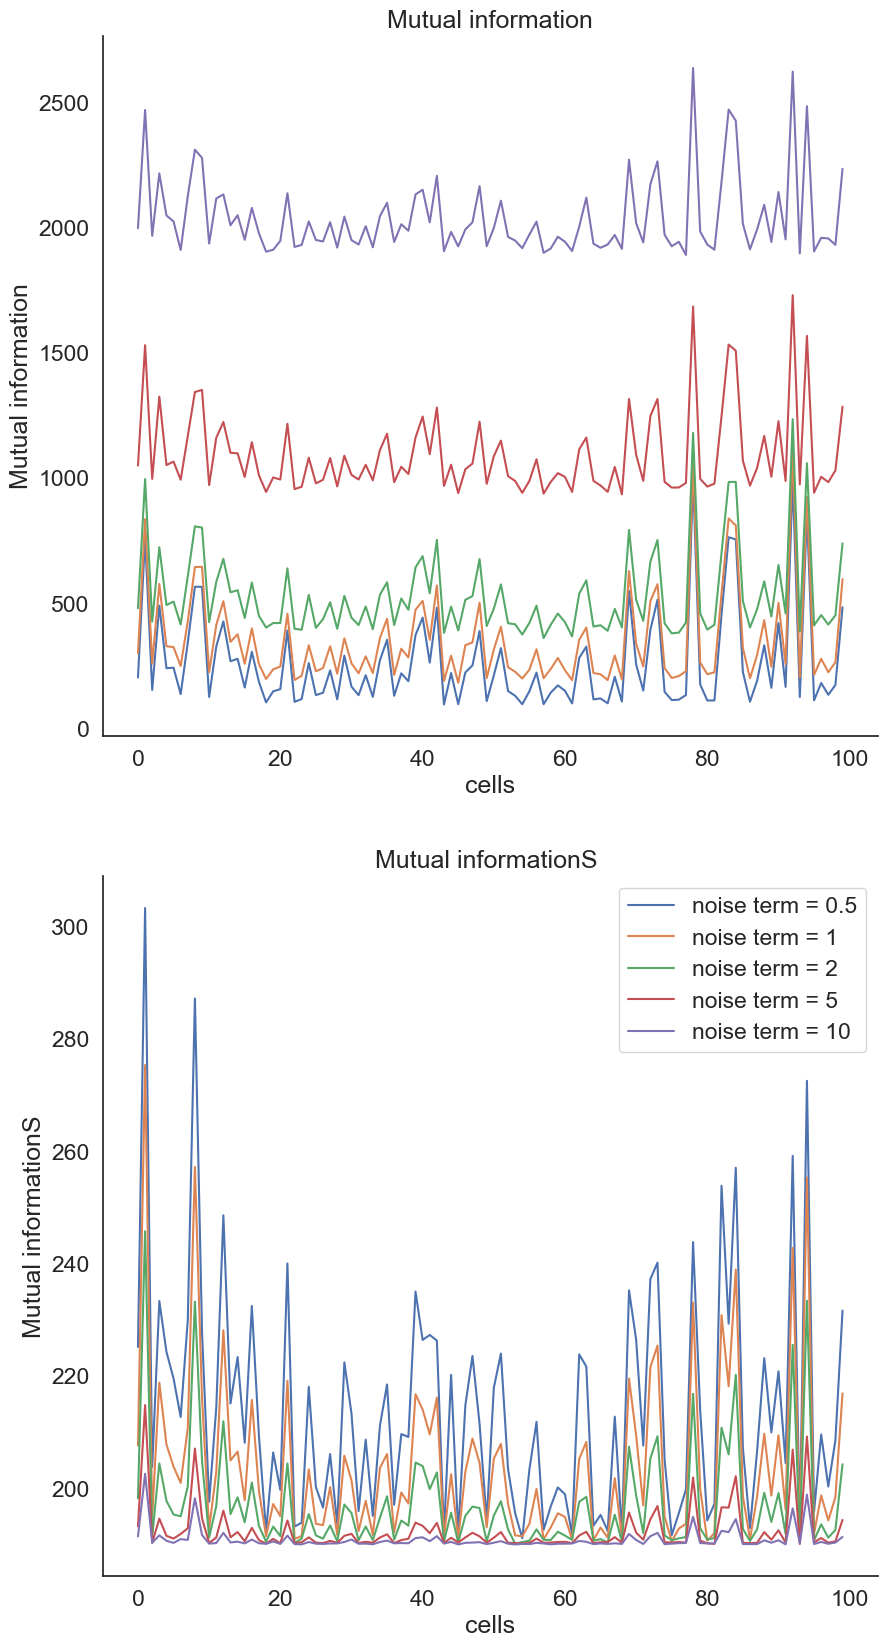

In [100]:
noise_array = [0.5,1,2,5,10]
plt.figure(figsize = (10,20))

for noise in noise_array:
    firing_rate_maps, occupancy = change_Noise_ex2(noise)
    mutualInformation_array = []
    mutualInformationS_array = []
    for i in range(np.shape(firing_rate_maps)[0]):
        mutualInformation_array = np.append(mutualInformation_array,mutualInformation(firing_rate_maps[i],occupancy)[0])
        mutualInformationS_array = np.append(mutualInformationS_array,mutualInformation(firing_rate_maps[i],occupancy)[1])
    
    
    plt.subplot(2,1,1)
    plt.plot(mutualInformation_array,label = f"noise term = {noise}")
    #plt.legend()
    plt.xlabel('cells')
    plt.ylabel('Mutual information')
    plt.title('Mutual information')
    
    
    plt.subplot(2,1,2)
    plt.plot(mutualInformationS_array,label = f"noise term = {noise}")
    plt.legend()
    plt.xlabel('cells')
    plt.ylabel('Mutual informationS')
    plt.title('Mutual informationS ')

The mutual information increases with an higher noise rate. I seems to be with just a added factor, this makes sense as the formula depends on the total amount of spikes.  The mutual infromationS seems to decrease. It is divided by a factor.

## Exercise 3 - working with real data
---
Load the data from `linear_track_data.pickle`. It contains neural recordings from a mouse running on a linear track.
- `x` contains the position of the animal
- `t` contains the corresponding times, in seconds
- `spikes` contains a list of lists. Each list contains the timestamps of the spikes emitted by a neuron.

A - Visualiaze the position a s a function of time. Plot the spike of a selected cell in space.

B - Calculate the firing rate maps for all the cells, and plot them sorted by increasing peak positon.

C - Calculate the spatial information for each cell, and plot the distribution. Plot the firing rate maps of the 5 cells with lower spatial information, and the firing rate maps of the 5 cells with higher spatial information. Comment on the differences.

### Import data

In [101]:
import numpy as np
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from tqdm import tqdm
import seaborn as sns
import pickle
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


In [102]:
# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/FeDX3LfbJ4pC7T6')

In [103]:
#import data
with open('data/linear_track_data.pickle', 'rb') as handle:
    data = pickle.load(handle)

x = data['x']
t = data['t']
spikes = data['spikes']
n_cells = len(spikes)

### A

Text(0.5, 1.0, 'Position as a function of time')

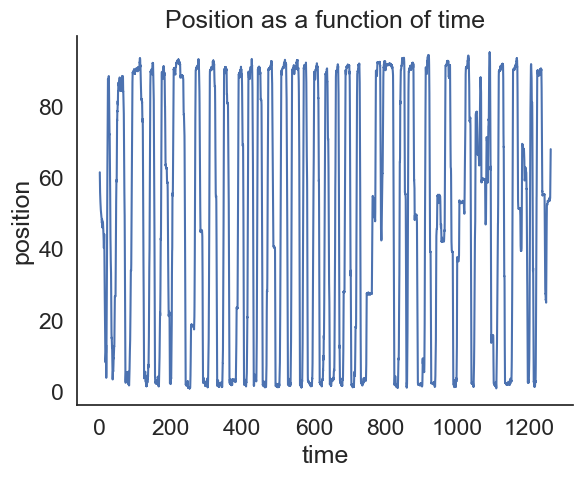

In [104]:
plt.plot(t,x)
plt.xlabel('time')
plt.ylabel('position')
plt.title('Position as a function of time')

Text(0, 0.5, 'position on track (cm)')

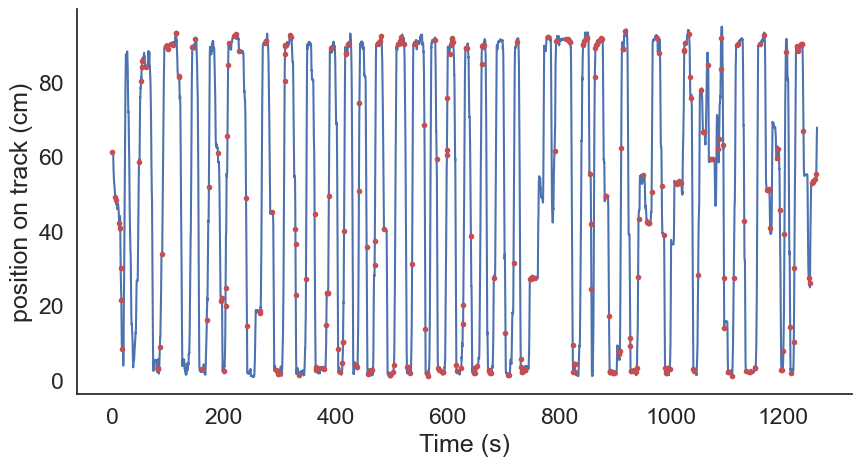

In [105]:
plt.figure(figsize=(10,5))
plt.plot(t, x)
plt.plot(spikes[10], np.interp(spikes[10], t, x), 'r.')
plt.xlabel('Time (s)')
plt.ylabel('position on track (cm)')

In [106]:
def plot_unit(i):
    plt.figure(figsize=(10,5))
    plt.plot(t, x)
    plt.plot(spikes[i], np.interp(spikes[i], t, x), 'r.')
    plt.xlabel('Time (s)')
    plt.ylabel('position on track (cm)')

interact(plot_unit, i = widgets.IntSlider(min=0, max=(n_cells-1), value=0))

interactive(children=(IntSlider(value=0, description='i', max=71), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_unit(i)>

Text(0, 0.5, 'position on track (cm)')

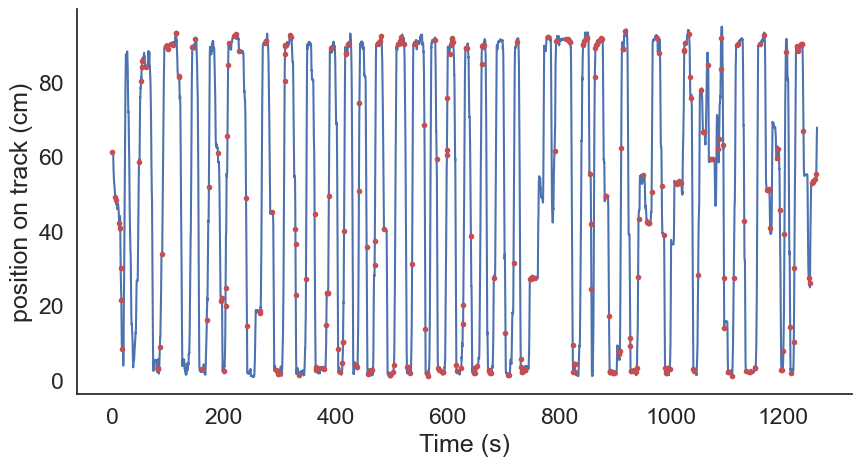

In [107]:
plt.figure(figsize=(10,5))
plt.plot(t, x)
plt.plot(spikes[10], np.interp(spikes[10], t, x), 'r.')
plt.xlabel('Time (s)')
plt.ylabel('position on track (cm)')

### B

In [108]:
fps = 30

spike_positions = [np.interp(s, t, x) for s in spikes]

space_bins = np.arange(0., 100.,5)

# we compute histograms for eaxh cell
spikes_hist= [np.histogram(s, space_bins)[0] for s in spike_positions]

# put them together into a matrix of floating point numbers (for plotting)
spikes_hist = np.vstack(spikes_hist).astype(np.float64)

# we also need an "occupancy histogram" in order to normalize the firing rates maps 
occupancy = np.histogram(x, space_bins)[0] /  fps

firing_rate_maps = spikes_hist / occupancy 

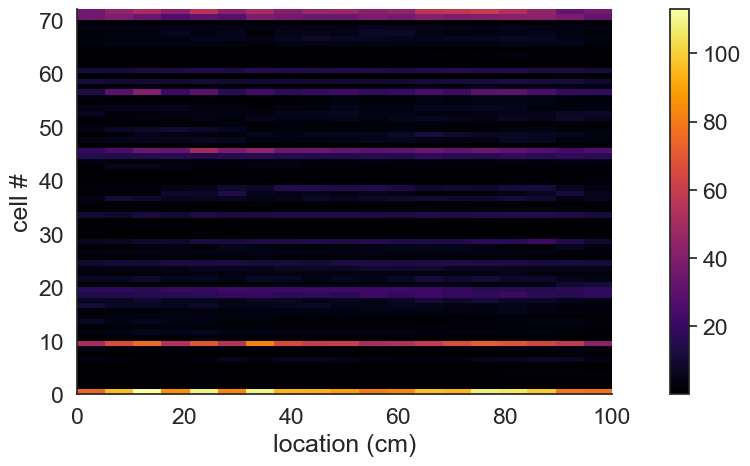

In [109]:
plt.figure(figsize=(15,5))
plt.imshow(firing_rate_maps, cmap='inferno', extent = [0, 100, 0, n_cells])
plt.xlabel('location (cm)')
plt.ylabel('cell #')
plt.colorbar()

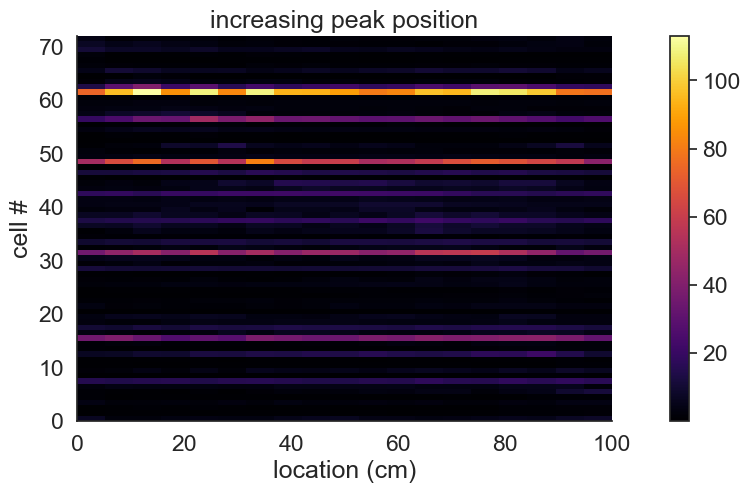

In [129]:
plt.figure(figsize=(15,5))
peak_locations = firing_rate_maps.argmax(axis=1)
ix = np.argsort(peak_locations)
plt.imshow(firing_rate_maps[ix,:], cmap='inferno', extent = [0, 100, 0, n_cells])
plt.xlabel('location (cm)')
plt.ylabel('cell #')
plt.title('increasing peak position')
plt.colorbar()

### C


In [111]:
def mutualInformation(firing_rate_map,occupancy):
    de = 10**(-15)
    Information = 0
    average_firing_rate = np.mean(firing_rate_map)
    #average_firing_rate = 5
    for j in range(len(firing_rate_map)):
        Information += firing_rate_map[j] * np.log2((firing_rate_map[j]+de)/average_firing_rate * occupancy[j])
    InformationS = Information/average_firing_rate
    return Information, InformationS

In [123]:
mutualInformation_array = []
mutualInformationS_array = []
for i in range(np.shape(firing_rate_maps)[0]):
    
    mutualInformation_array = np.append(mutualInformation_array,mutualInformation(firing_rate_maps[i],occupancy)[0])
    mutualInformationS_array = np.append(mutualInformationS_array,mutualInformation(firing_rate_maps[i],occupancy)[1])

sort_mutual_information = np.argsort(mutualInformation_array)
sort_mutual_informationS = np.argsort(mutualInformationS_array)


In [124]:
lowest_mutual_information = sort_mutual_information[:5]
highest_mutual_information = sort_mutual_information[-5:]

lowest_mutual_informationS = sort_mutual_informationS[:5]
highest_mutual_informationS = sort_mutual_informationS[-5:]

Text(0, 0.5, 'Mutual information')

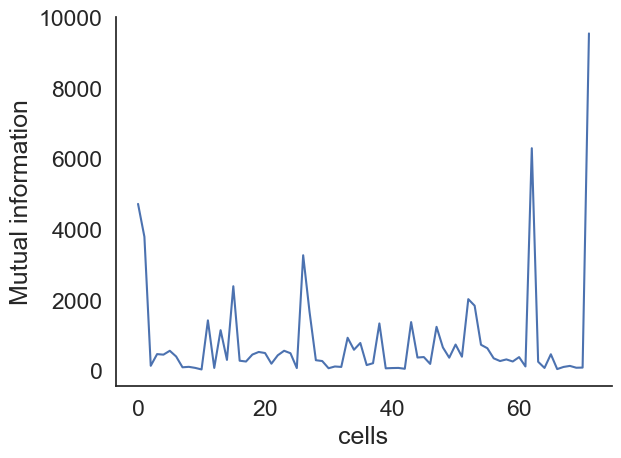

In [125]:
plt.plot(mutualInformation_array,label= "mutual information")
plt.xlabel('cells')
plt.ylabel('Mutual information')

Text(0, 0.5, 'Mutual informationS')

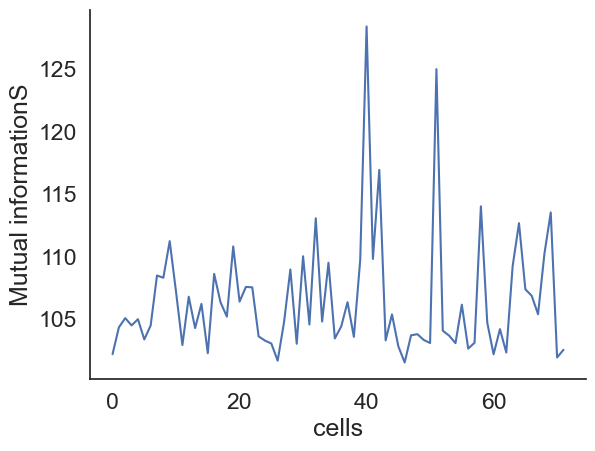

In [126]:
plt.plot(mutualInformationS_array, label = 'mutual informationS')
plt.xlabel('cells')
plt.ylabel('Mutual informationS')

Text(0.5, 1.0, 'Five lowest spatial information')

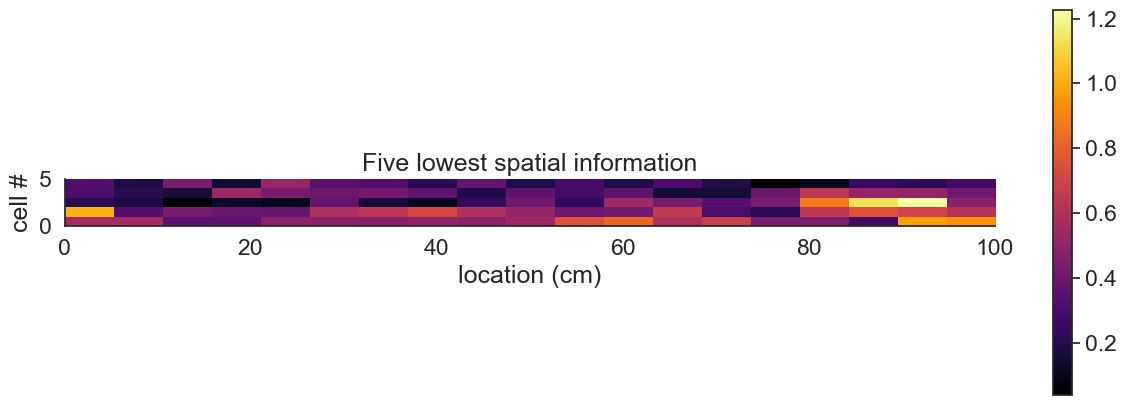

In [121]:
plt.figure(figsize=(15,5))
peak_locations = firing_rate_maps.argmax(axis=1)
ix = np.argsort(peak_locations)
plt.imshow(firing_rate_maps[lowest_mutual_information], cmap='inferno', extent = [0, 100, 0, 5])
plt.xlabel('location (cm)')
plt.ylabel('cell #')
plt.colorbar()
plt.title('Five lowest spatial information')

Text(0.5, 1.0, 'Five highest spatial information')

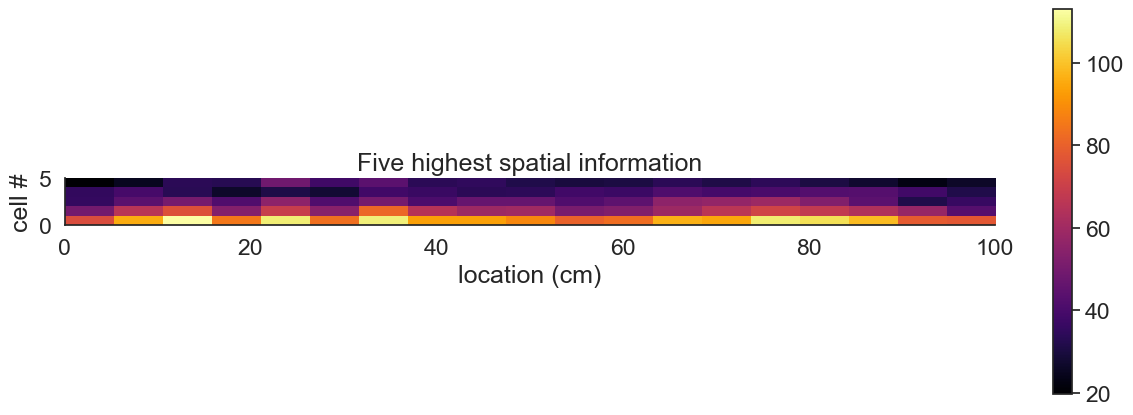

In [122]:
plt.figure(figsize=(15,5))
peak_locations = firing_rate_maps.argmax(axis=1)
ix = np.argsort(peak_locations)
plt.imshow(firing_rate_maps[highest_mutual_information], cmap='inferno', extent = [0, 100, 0, 5])
plt.xlabel('location (cm)')
plt.ylabel('cell #')
plt.colorbar()
plt.title('Five highest spatial information')

We can see that the five cells with the lowest spatial information are more random than the five with the highest spatial information. The five cells with the lowest spatial information also have a way lower total number of spikes as can be seen in the side bar. Even in the five highest spatial information we don't realy see a nice location but it is more smooth, no black gaps inf between.